In [5]:
%matplotlib notebook
import os
from mpl_toolkits import mplot3d 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mpld3
mpld3.enable_notebook()

In [7]:
# paths to the isomap projected database and the pivot table (to take the masks for coloring databases)

paths = [
    "./isomap_o_dim5.csv",
    "./pivot_o.csv"
]

# paths to the isomap projected database and the pivot table (to take the masks for coloring databases)
# root_mf = './separate_datasets_transformed_data/'
# paths = [os.path.join(root_mf,path) for path in os.listdir(root_mf)]

In [8]:
# load dataset with isomap projected data, pca projected is not recommended beacuse of the high computational cost 
dataset = np.genfromtxt(paths[0], delimiter=';')

In [9]:
# add databases names to convert them into colors

color_info = pd.read_csv(paths[1], delimiter = ';', low_memory=False)

In [10]:
color_info

Unnamed: 0  o__  o__Acidimicrobiales  o__Acidobacteriales  \
0      10317.000052344  0.0                  0.0                  0.0   
1      10317.000052366  0.0                  0.0                  0.0   
2      10317.000052369  0.0                  0.0                  0.0   
3       10317.00005237  0.0                  0.0                  0.0   
4      10317.000052372  0.0                  0.0                  0.0   
...                ...  ...                  ...                  ...   
14093         MSM5LLIO  0.0                  0.0                  0.0   
14094         MSM5LLIQ  0.0                  0.0                  0.0   
14095         MSM5ZOJY  0.0                  0.0                  0.0   
14096         MSM633FF  0.0                  0.0                  0.0   
14097        otu_table  0.0                  0.0                  0.0   

       o__Actinomycetales  o__Aeromonadales  o__Alteromonadales  \
0                0.001334               0.0                 0.0   
1                0.007542               0.0                 0.0   
2                0.000838               0.0                 0.0   
3                0.000000               0.0                 0.0   
4                0.000693               0.0                 0.0   
...                   ...               ...                 ...   
14093            0.000000               0.0                 0.0   
14094            0.000000               0.0                 0.0   
14095            0.000000               0.0                 0.0   
14096            0.000930               0.0                 0.0   
14097            0.000023               0.0                 0.0   

       o__Anaeroplasmatales  o__Aquificales  o__Bacillales  ...  o__SBla14  \
0                       0.0             0.0       0.000140  ...        0.0   
1                       0.0             0.0       0.001019  ...        0.0   
2                       0.0             0.0       0.000000  ...        0.0   
3                       0.0             0.0       0.000000  ...        0.0   
4                       0.0             0.0       0.000000  ...        0.0   
...                     ...             ...            ...  ...        ...   
14093                   0.0             0.0       0.000000  ...        0.0   
14094                   0.0             0.0       0.000286  ...        0.0   
14095                   0.0             0.0       0.000000  ...        0.0   
14096                   0.0             0.0       0.000000  ...        0.0   
14097                   0.0             0.0       0.000000  ...        0.0   

       o__Sphaerochaetales  o__Spirobacillales  o__Sva0725  \
0                      0.0                 0.0         0.0   
1                      0.0                 0.0         0.0   
2                      0.0                 0.0         0.0   
3                      0.0                 0.0         0.0   
4                      0.0                 0.0         0.0   
...                    ...                 ...         ...   
14093                  0.0                 0.0         0.0   
14094                  0.0                 0.0         0.0   
14095                  0.0                 0.0         0.0   
14096                  0.0                 0.0         0.0   
14097                  0.0                 0.0         0.0   

       o__Thermoanaerobacterales  o__Thermogemmatisporales  \
0                            0.0                       0.0   
1                            0.0                       0.0   
2                            0.0                       0.0   
3                            0.0                       0.0   
4                            0.0                       0.0   
...                          ...                       ...   
14093                        0.0                       0.0   
14094                        0.0                       0.0   
14095                        0.0                       0.0   
14096                       

In [7]:
# insert column for colors

color_info.insert(1, "color", True)

In [11]:
# copy the names to that column

color_info["color"] = color_info["Unnamed: 0"]

In [15]:
color_info["Unnamed: 0"].value_counts()

10317.000015256      1
10317.000036470      1
EP893965_K40_MRCD    1
10317.000007322      1
EP972460_K20_MRCD    1
                    ..
EP338059_K90_BRCD    1
EP850673_K10_MRCD    1
10317.000036720      1
10317.000023390      1
EP275797_K70_BS1D    1
Name: Unnamed: 0, Length: 14098, dtype: int64

In [9]:
# function to convert names to colors. Suffix information is enough. Each database has specific color

def check(name) :
    if (name.startswith("103")) :
        return 'b' # 'AGP' 
    elif (name.startswith("EP")) :
        return 'r' # 'PTB' 
    elif (name.startswith("HMP2_") or (name.startswith("otu"))) :
        return 'g' # 'T2D'
    else :
        return 'y' # 'IBD'

In [10]:
# apply coloring to the full dataset

color_info["color"] = color_info["color"].apply(check)

In [11]:
# Check that the databases are marked properly

color_info["color"].value_counts()

b    9511
r    3457
g    1044
y      86
Name: color, dtype: int64

<IPython.core.display.Javascript object>


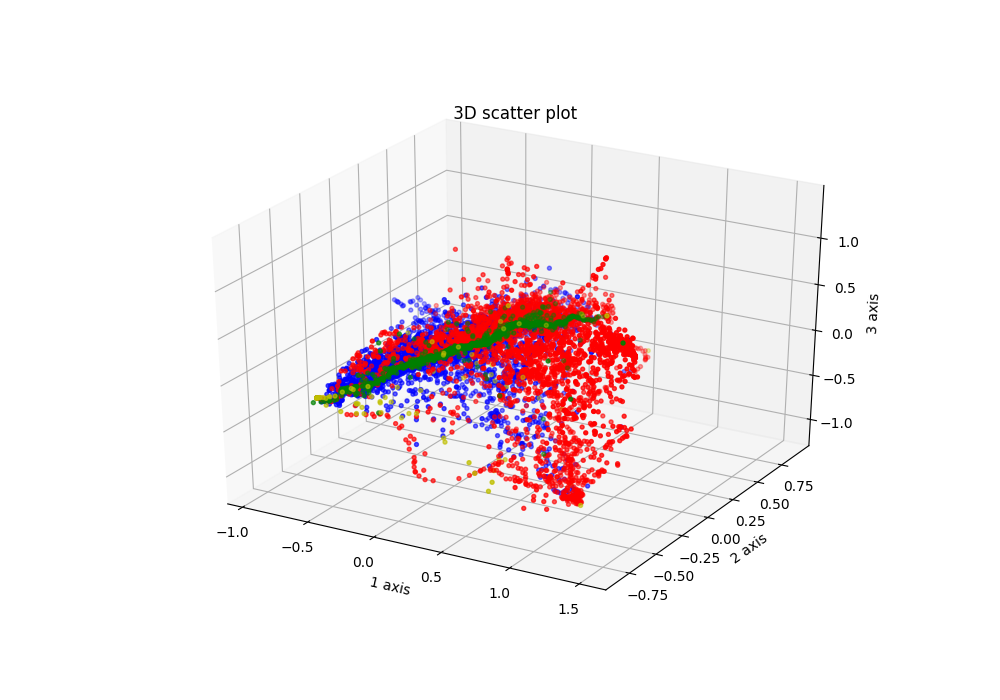

In [19]:
#projection on the axes (1,2,3)

fig = plt.figure(figsize = (10, 7)) 
ax = plt.axes(projection ="3d")

ax.scatter3D(dataset[:, 0], dataset[:, 1], dataset[:, 2], color = color_info["color"], s = 8)
plt.title(" 3D scatter plot")
ax.set_xlabel('1 axis')
ax.set_ylabel('2 axis')
ax.set_zlabel('3 axis')
plt.show()

<IPython.core.display.Javascript object>


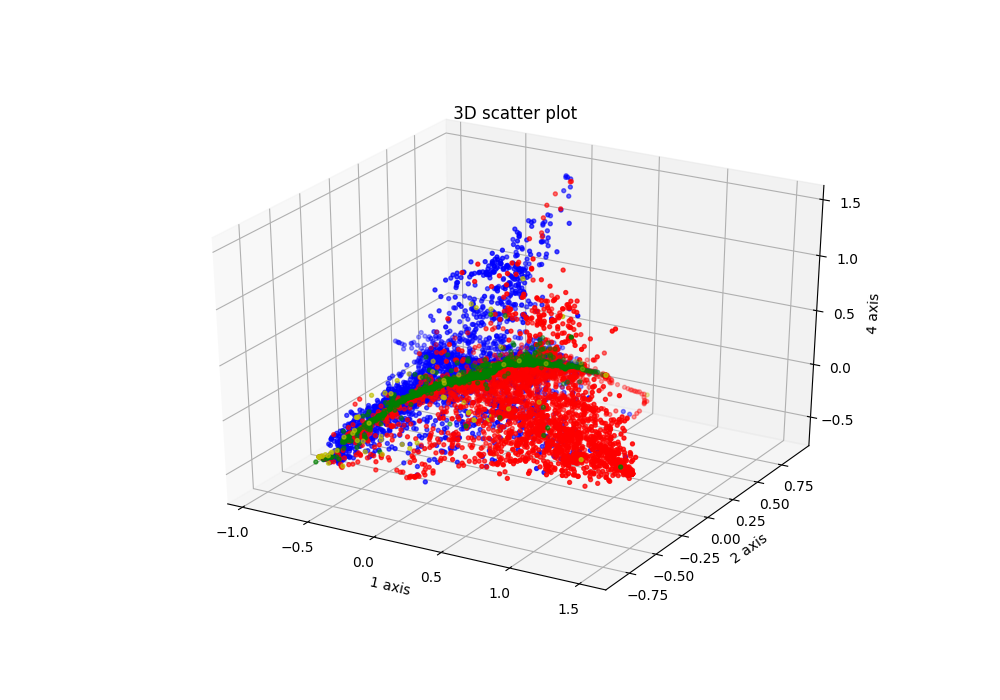

In [20]:
#projection on the axes (1,2,4)

fig = plt.figure(figsize = (10, 7)) 
ax = plt.axes(projection ="3d")

ax.scatter3D(dataset[:, 0], dataset[:, 1], dataset[:, 3], color = color_info["color"], s = 8)
plt.title(" 3D scatter plot")
ax.set_xlabel('1 axis')
ax.set_ylabel('2 axis')
ax.set_zlabel('4 axis')
plt.show()

<IPython.core.display.Javascript object>


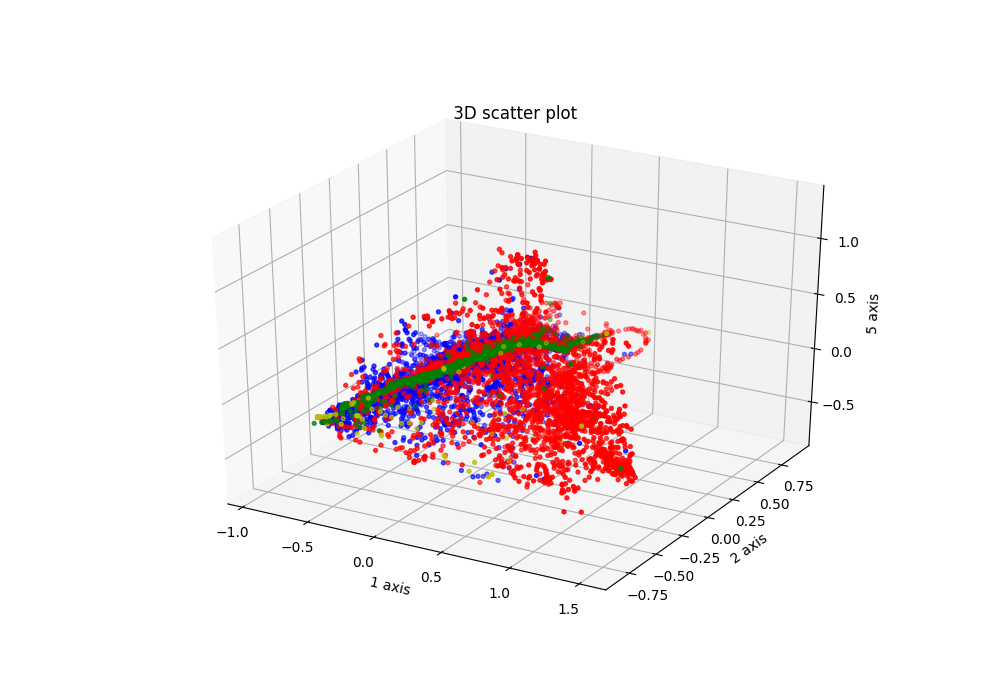

In [21]:
#projection on the axes (1,2,5)

fig = plt.figure(figsize = (10, 7)) 
ax = plt.axes(projection ="3d")

ax.scatter3D(dataset[:, 0], dataset[:, 1], dataset[:, 4], color = color_info["color"], s = 8)
plt.title(" 3D scatter plot")
ax.set_xlabel('1 axis')
ax.set_ylabel('2 axis')
ax.set_zlabel('5 axis')
plt.show()

<IPython.core.display.Javascript object>


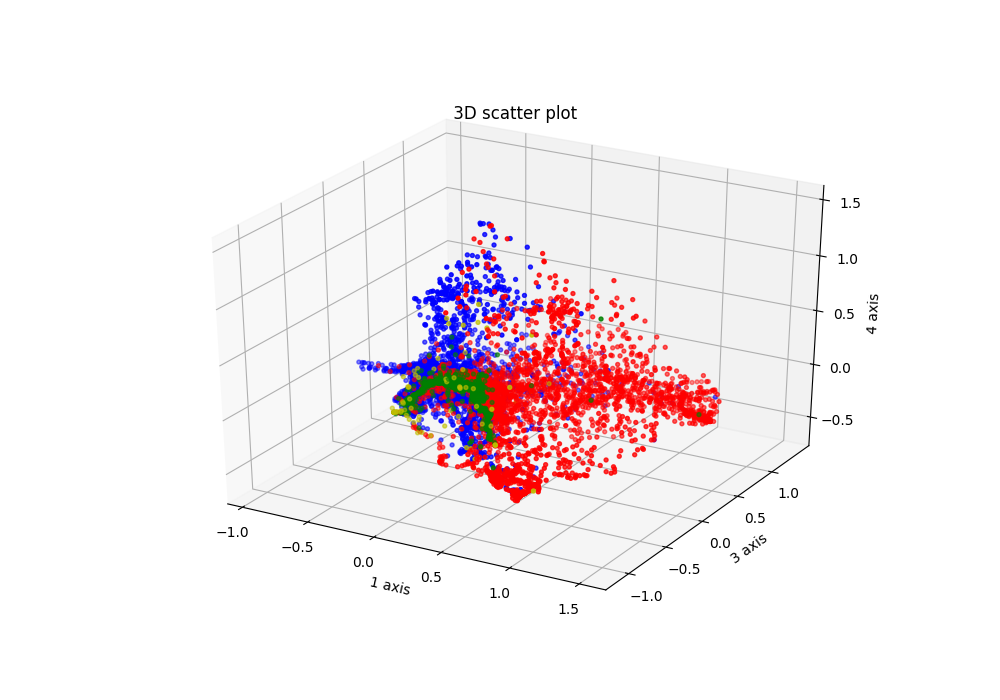

In [22]:
#projection on the axes (1,3,4)

fig = plt.figure(figsize = (10, 7)) 
ax = plt.axes(projection ="3d")

ax.scatter3D(dataset[:, 0], dataset[:, 2], dataset[:, 3], color = color_info["color"], s = 8)
plt.title(" 3D scatter plot")
ax.set_xlabel('1 axis')
ax.set_ylabel('3 axis')
ax.set_zlabel('4 axis')
plt.show()

<IPython.core.display.Javascript object>


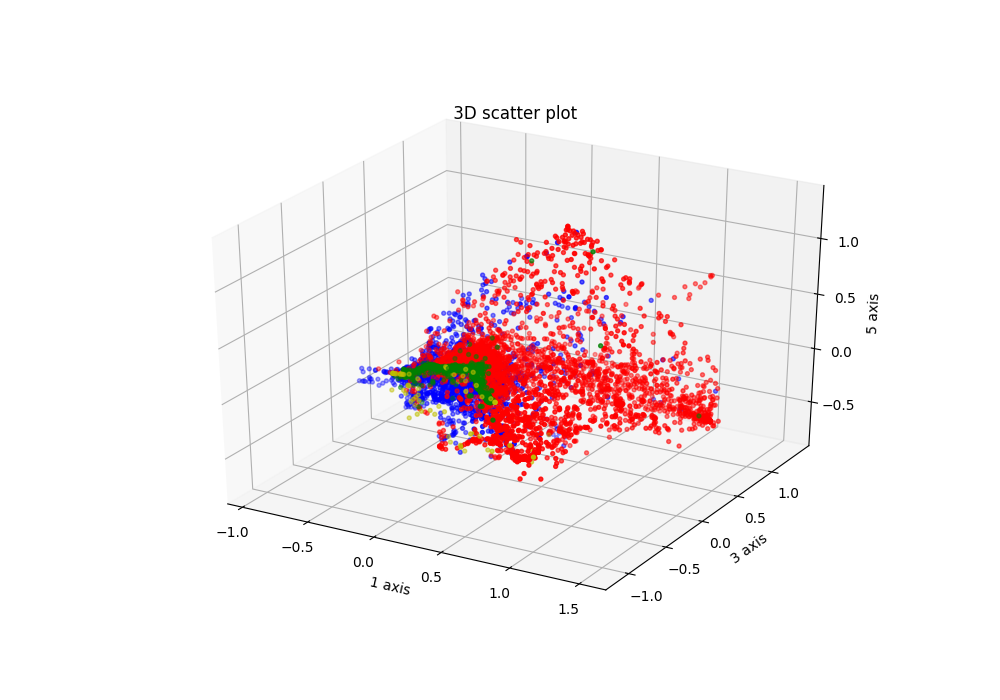

In [23]:
#projection on the axes (1,3,5)

fig = plt.figure(figsize = (10, 7)) 
ax = plt.axes(projection ="3d")

ax.scatter3D(dataset[:, 0], dataset[:, 2], dataset[:, 4], color = color_info["color"], s = 8)
plt.title(" 3D scatter plot")
ax.set_xlabel('1 axis')
ax.set_ylabel('3 axis')
ax.set_zlabel('5 axis')
plt.show()

<IPython.core.display.Javascript object>


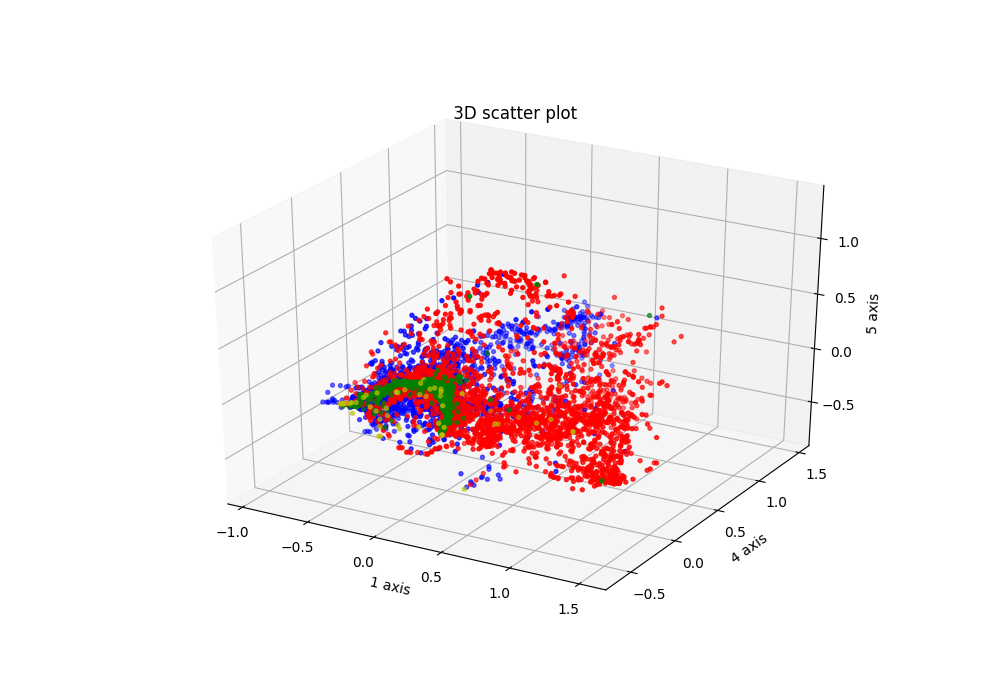

In [24]:
#projection on the axes (1,4,5)

fig = plt.figure(figsize = (10, 7)) 
ax = plt.axes(projection ="3d")

ax.scatter3D(dataset[:, 0], dataset[:, 3], dataset[:, 4], color = color_info["color"], s = 8)
plt.title(" 3D scatter plot")
ax.set_xlabel('1 axis')
ax.set_ylabel('4 axis')
ax.set_zlabel('5 axis')
plt.show()

<IPython.core.display.Javascript object>


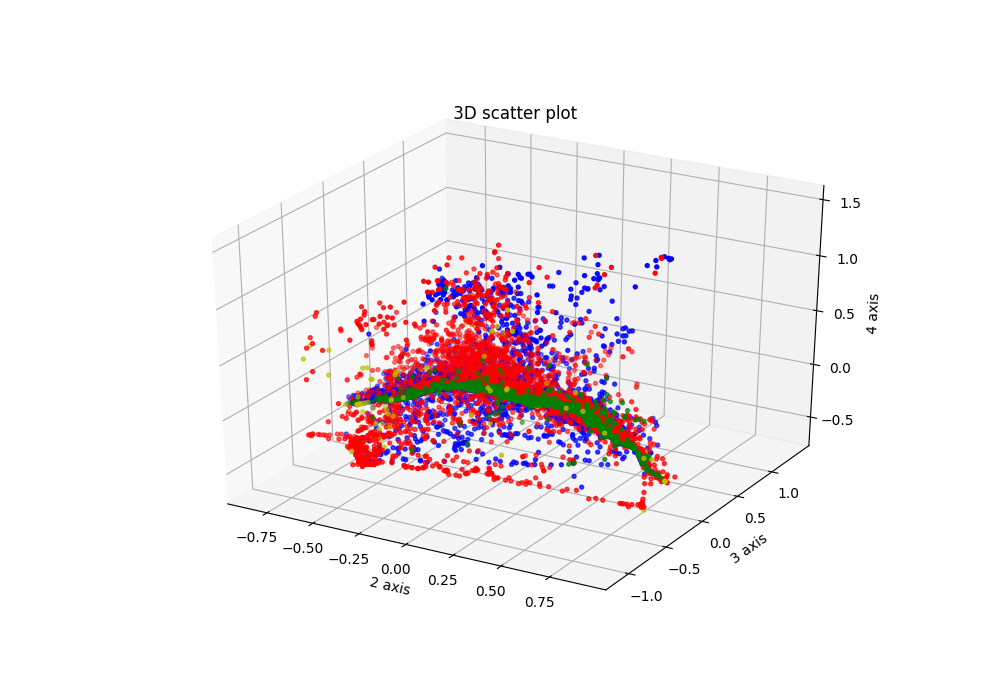

In [25]:
#projection on the axes (2,3,4)

fig = plt.figure(figsize = (10, 7)) 
ax = plt.axes(projection ="3d")

ax.scatter3D(dataset[:, 1], dataset[:, 2], dataset[:, 3], color = color_info["color"], s = 8)
plt.title(" 3D scatter plot")
ax.set_xlabel('2 axis')
ax.set_ylabel('3 axis')
ax.set_zlabel('4 axis')
plt.show()

<IPython.core.display.Javascript object>


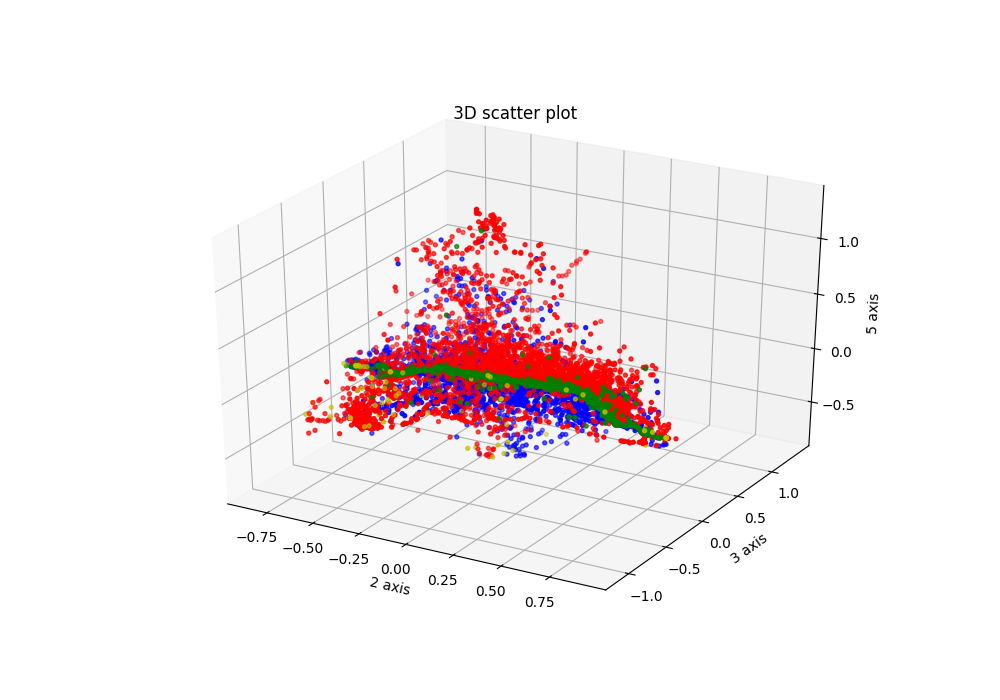

In [26]:
#projection on the axes (2,3,5)

fig = plt.figure(figsize = (10, 7)) 
ax = plt.axes(projection ="3d")

ax.scatter3D(dataset[:, 1], dataset[:, 2], dataset[:, 4], color = color_info["color"], s = 8)
plt.title(" 3D scatter plot")
ax.set_xlabel('2 axis')
ax.set_ylabel('3 axis')
ax.set_zlabel('5 axis')
plt.show()

<IPython.core.display.Javascript object>


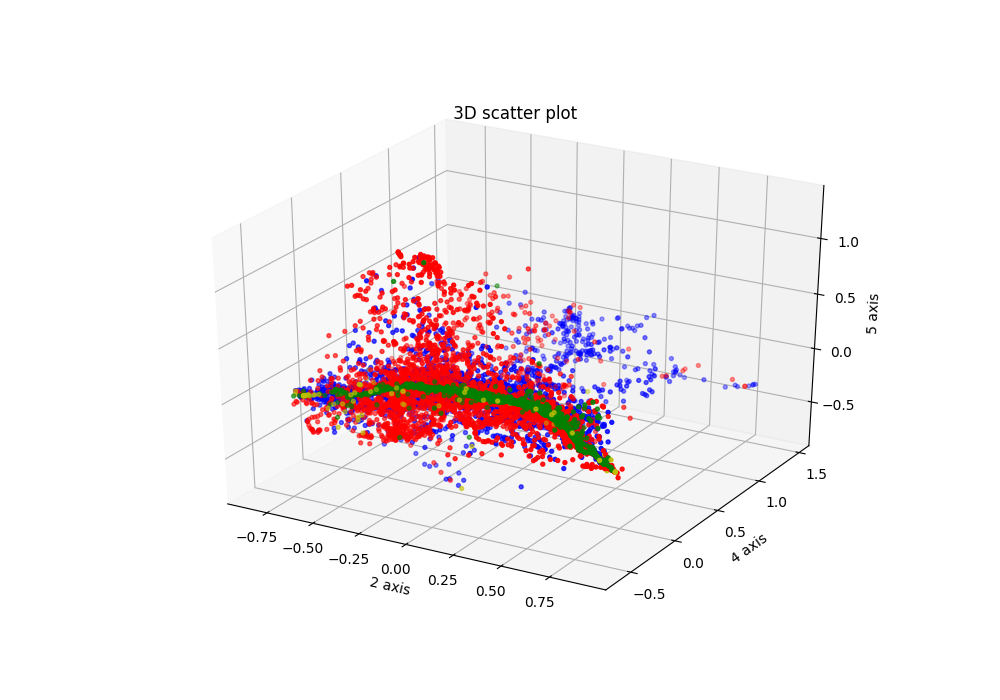

In [27]:
#projection on the axes (2,4,5)

fig = plt.figure(figsize = (10, 7)) 
ax = plt.axes(projection ="3d")

ax.scatter3D(dataset[:, 1], dataset[:, 3], dataset[:, 4], color = color_info["color"], s = 8)
plt.title(" 3D scatter plot")
ax.set_xlabel('2 axis')
ax.set_ylabel('4 axis')
ax.set_zlabel('5 axis')
plt.show()

<IPython.core.display.Javascript object>


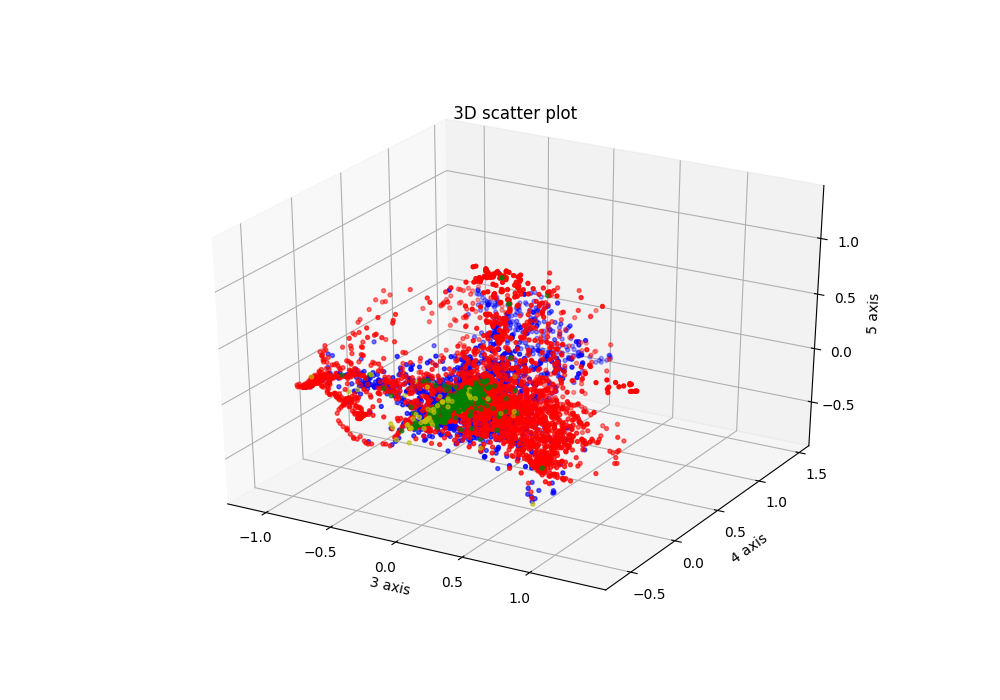

In [28]:
#projection on the axes (3,4,5)

fig = plt.figure(figsize = (10, 7)) 
ax = plt.axes(projection ="3d")

ax.scatter3D(dataset[:, 2], dataset[:, 3], dataset[:, 4], color = color_info["color"], s = 8)
plt.title(" 3D scatter plot")
ax.set_xlabel('3 axis')
ax.set_ylabel('4 axis')
ax.set_zlabel('5 axis')
plt.show()

<IPython.core.display.Javascript object>


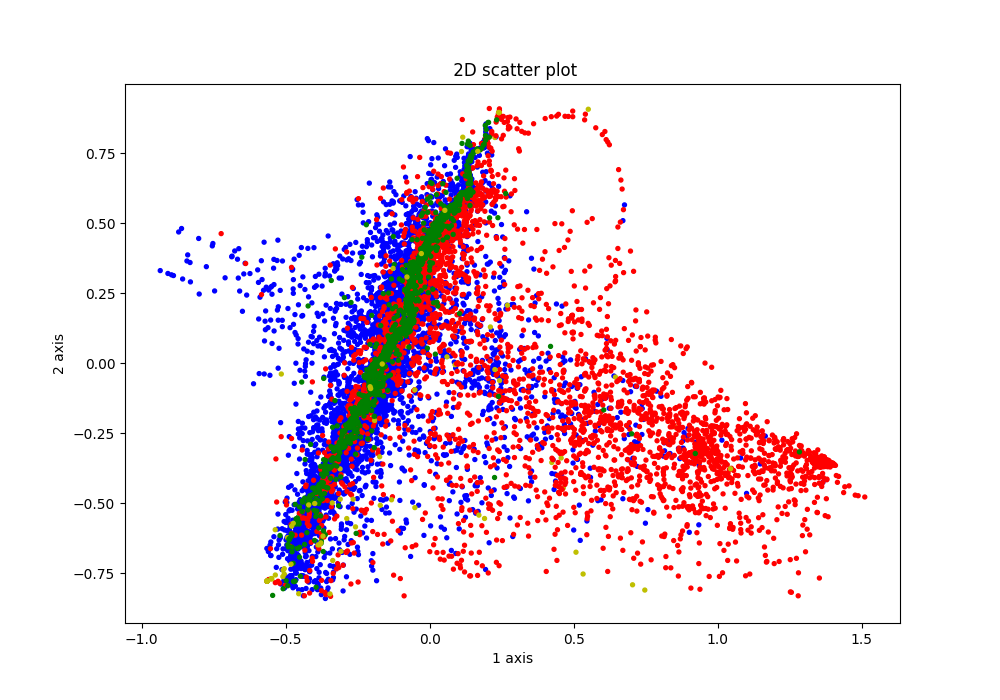

In [29]:
#projection on the axes (1,2)

fig = plt.figure(figsize = (10, 7)) 
ax = plt.axes(projection ="rectilinear")

ax.scatter(dataset[:, 0], dataset[:, 1], color = color_info["color"], s = 8)
plt.title(" 2D scatter plot")
ax.set_xlabel('1 axis')
ax.set_ylabel('2 axis')
plt.show()

<IPython.core.display.Javascript object>


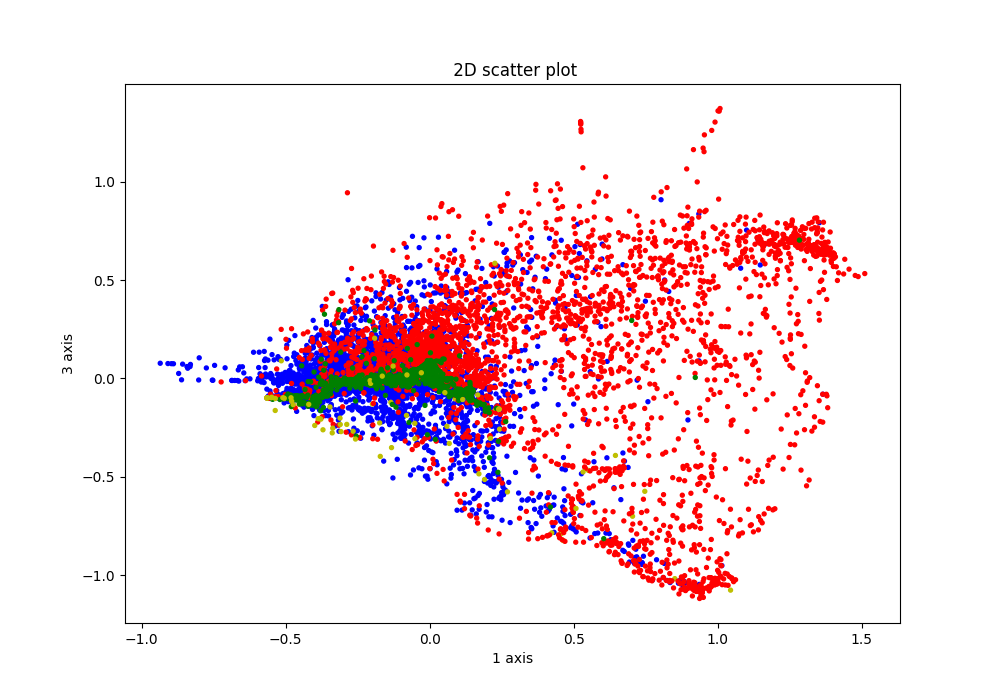

In [30]:
#projection on the axes (1,3)

fig = plt.figure(figsize = (10, 7)) 
ax = plt.axes(projection ="rectilinear")

ax.scatter(dataset[:, 0], dataset[:, 2], color = color_info["color"], s = 8)
plt.title(" 2D scatter plot")
ax.set_xlabel('1 axis')
ax.set_ylabel('3 axis')
plt.show()

<IPython.core.display.Javascript object>


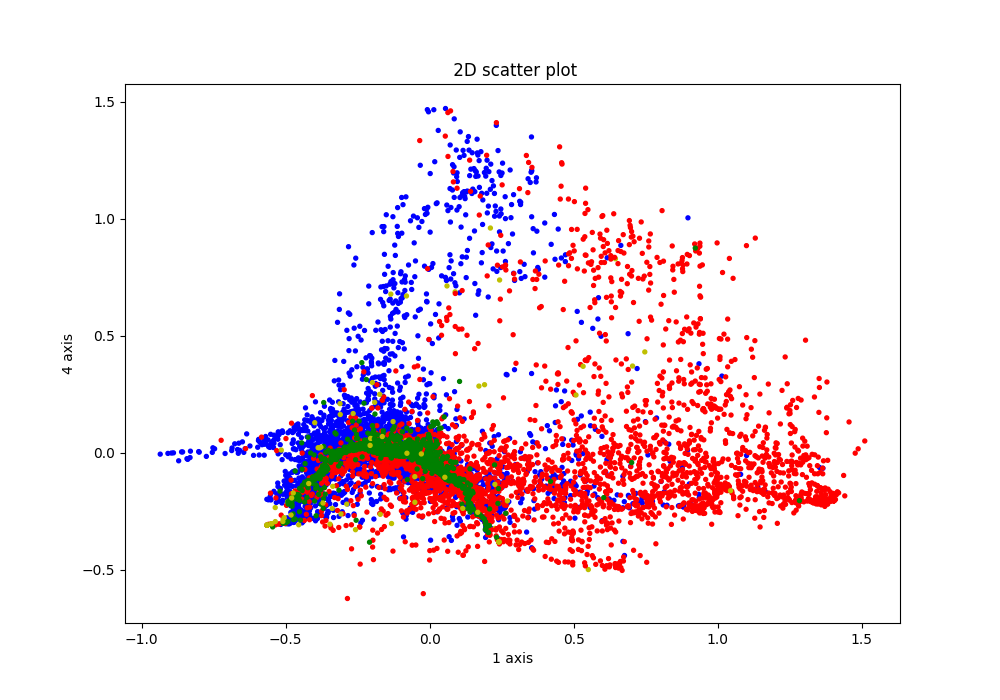

In [31]:
#projection on the axes (1,4)

fig = plt.figure(figsize = (10, 7)) 
ax = plt.axes(projection ="rectilinear")

ax.scatter(dataset[:, 0], dataset[:, 3], color = color_info["color"], s = 8)
plt.title(" 2D scatter plot")
ax.set_xlabel('1 axis')
ax.set_ylabel('4 axis')
plt.show()

<IPython.core.display.Javascript object>


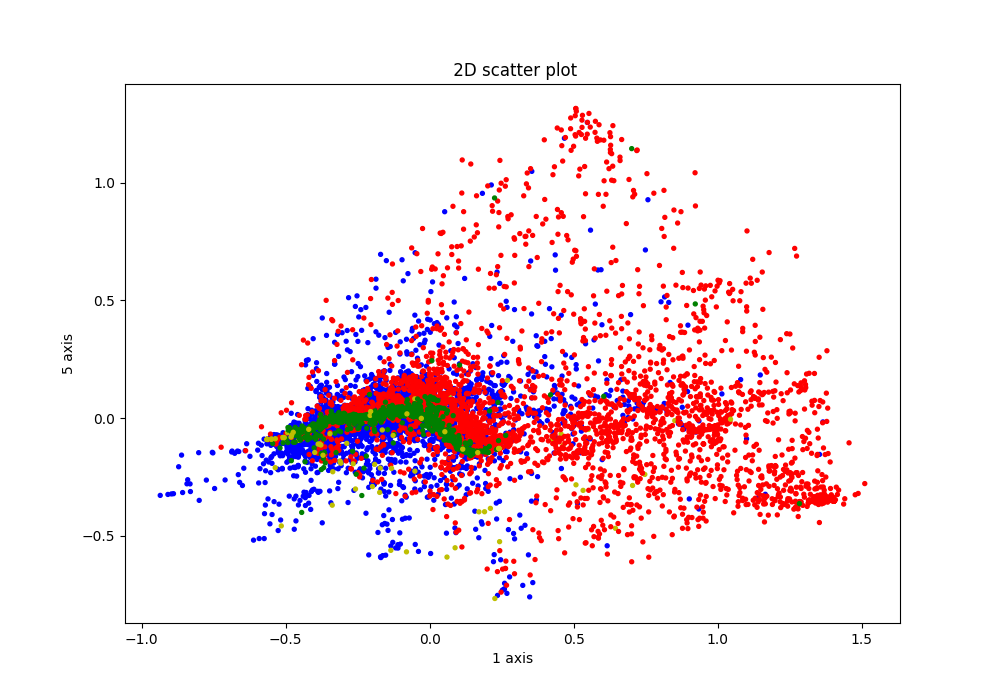

In [32]:
#projection on the axes (1,5)

fig = plt.figure(figsize = (10, 7)) 
ax = plt.axes(projection ="rectilinear")

ax.scatter(dataset[:, 0], dataset[:, 4], color = color_info["color"], s = 8)
plt.title(" 2D scatter plot")
ax.set_xlabel('1 axis')
ax.set_ylabel('5 axis')
plt.show()

<IPython.core.display.Javascript object>


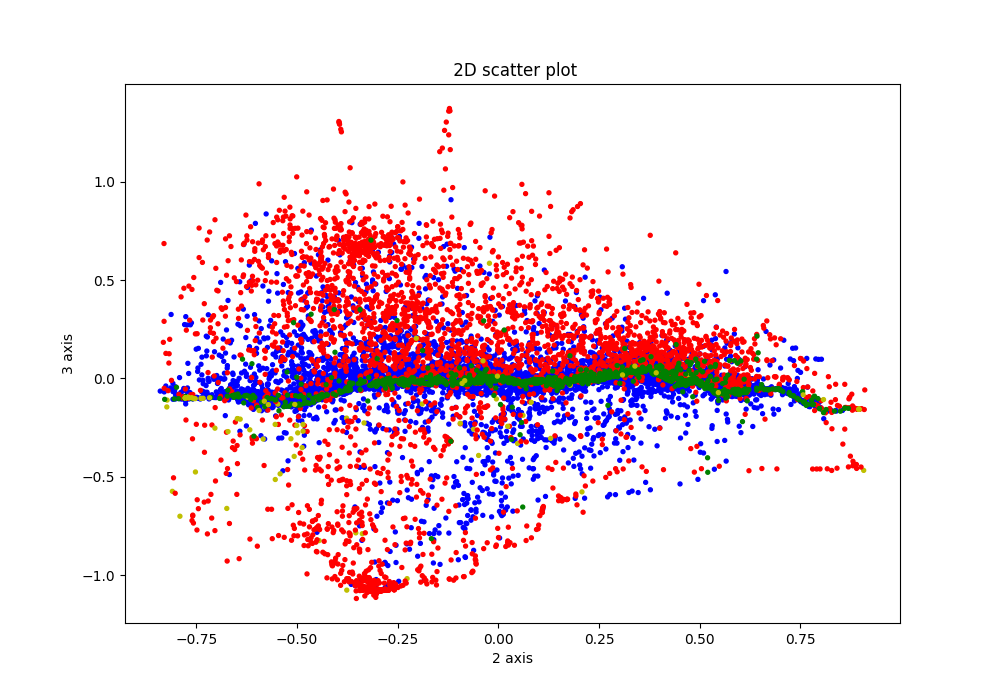

In [33]:
#projection on the axes (2,3)

fig = plt.figure(figsize = (10, 7)) 
ax = plt.axes(projection ="rectilinear")

ax.scatter(dataset[:, 1], dataset[:, 2], color = color_info["color"], s = 8)
plt.title(" 2D scatter plot")
ax.set_xlabel('2 axis')
ax.set_ylabel('3 axis')
plt.show()

<IPython.core.display.Javascript object>


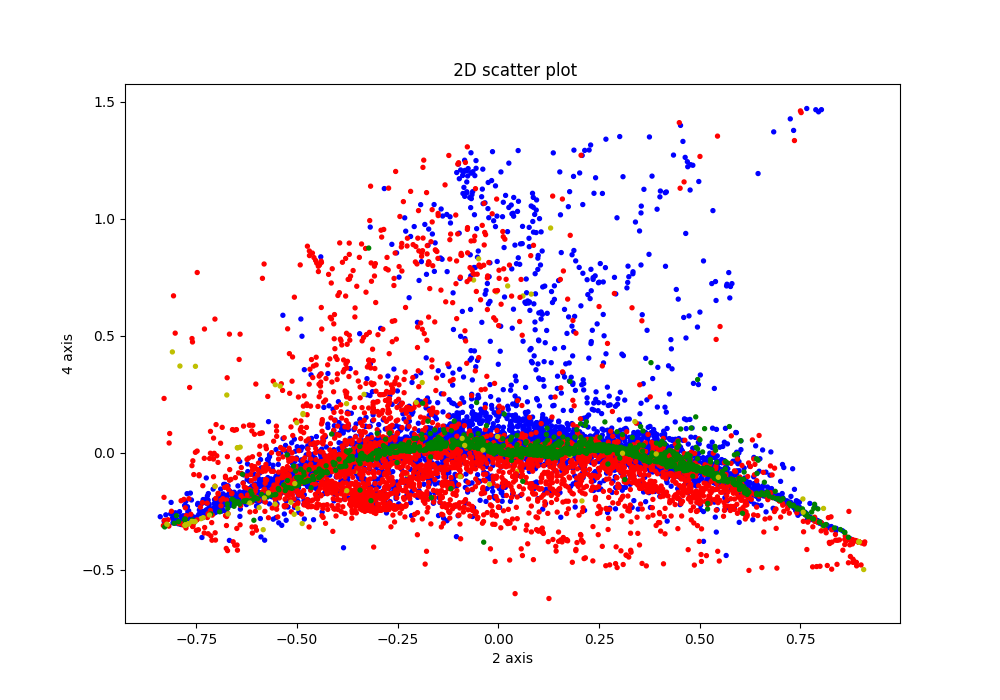

In [34]:
#projection on the axes (2,4)

fig = plt.figure(figsize = (10, 7)) 
ax = plt.axes(projection ="rectilinear")

ax.scatter(dataset[:, 1], dataset[:, 3], color = color_info["color"], s = 8)
plt.title(" 2D scatter plot")
ax.set_xlabel('2 axis')
ax.set_ylabel('4 axis')
plt.show()

<IPython.core.display.Javascript object>


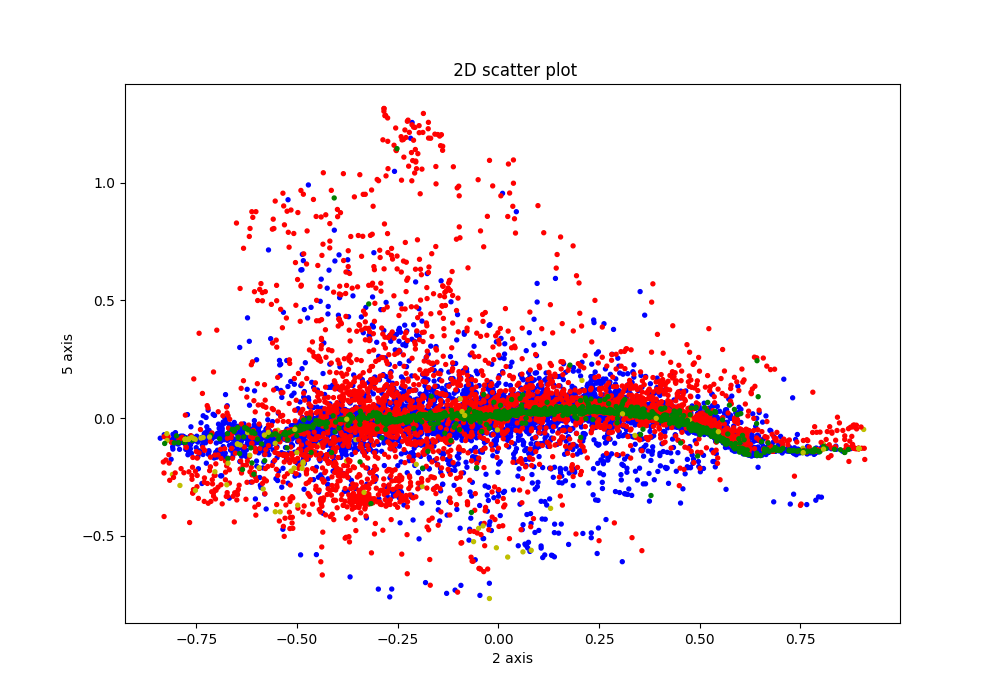

In [35]:
#projection on the axes (2,5)

fig = plt.figure(figsize = (10, 7)) 
ax = plt.axes(projection ="rectilinear")

ax.scatter(dataset[:, 1], dataset[:, 4], color = color_info["color"], s = 8)
plt.title(" 2D scatter plot")
ax.set_xlabel('2 axis')
ax.set_ylabel('5 axis')
plt.show()

<IPython.core.display.Javascript object>


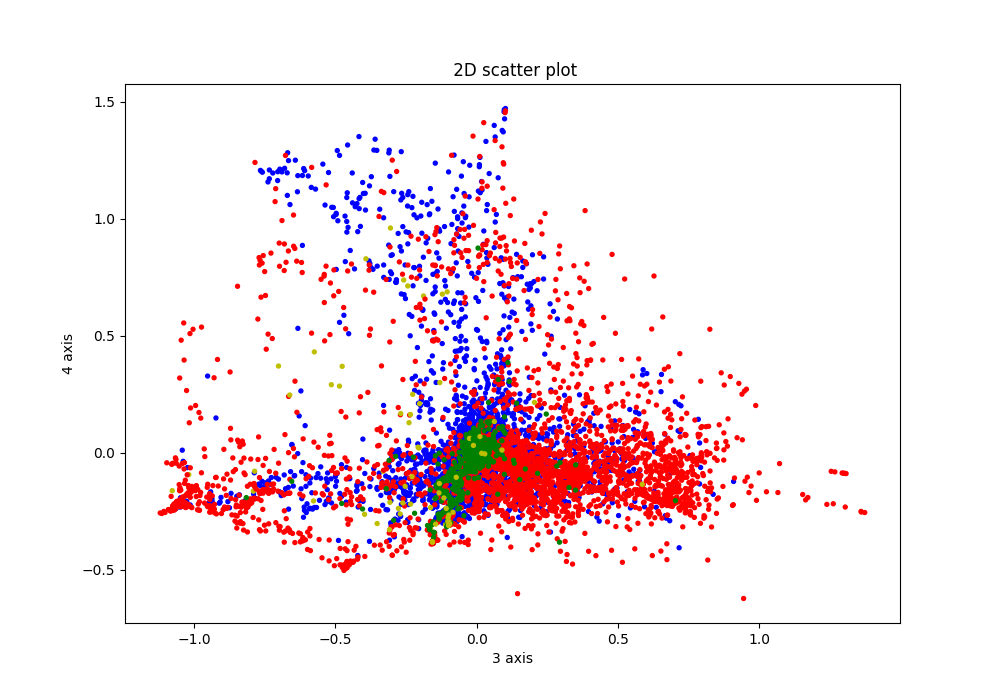

In [36]:
#projection on the axes (3,4)

fig = plt.figure(figsize = (10, 7)) 
ax = plt.axes(projection ="rectilinear")

ax.scatter(dataset[:, 2], dataset[:, 3], color = color_info["color"], s = 8)
plt.title(" 2D scatter plot")
ax.set_xlabel('3 axis')
ax.set_ylabel('4 axis')
plt.show()

<IPython.core.display.Javascript object>


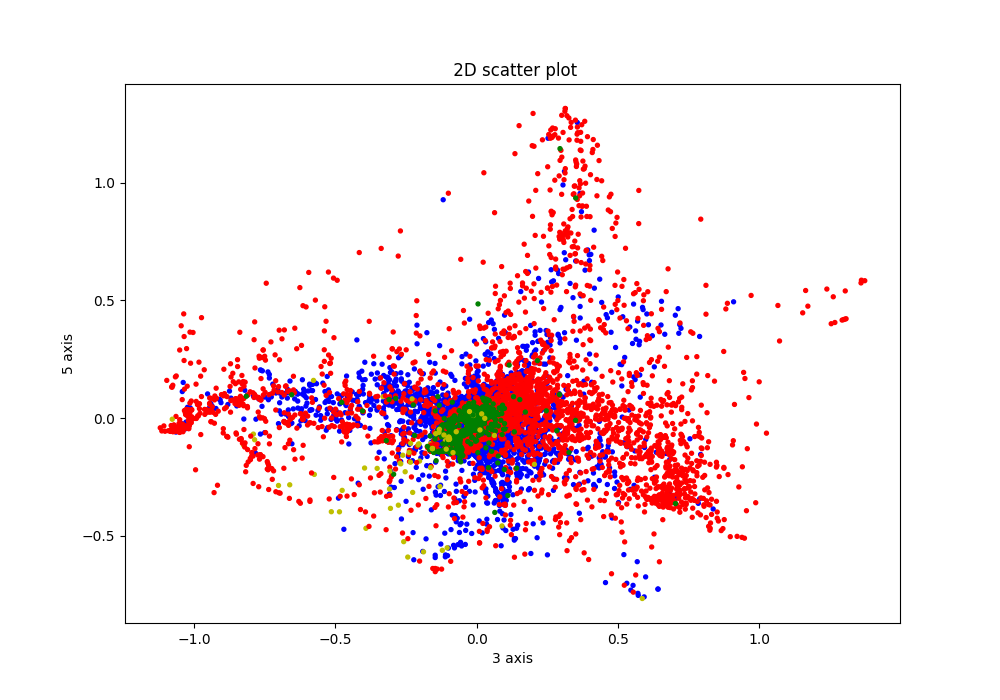

In [37]:
#projection on the axes (3,5)

fig = plt.figure(figsize = (10, 7)) 
ax = plt.axes(projection ="rectilinear")

ax.scatter(dataset[:, 2], dataset[:, 4], color = color_info["color"], s = 8)
plt.title(" 2D scatter plot")
ax.set_xlabel('3 axis')
ax.set_ylabel('5 axis')
plt.show()

<IPython.core.display.Javascript object>


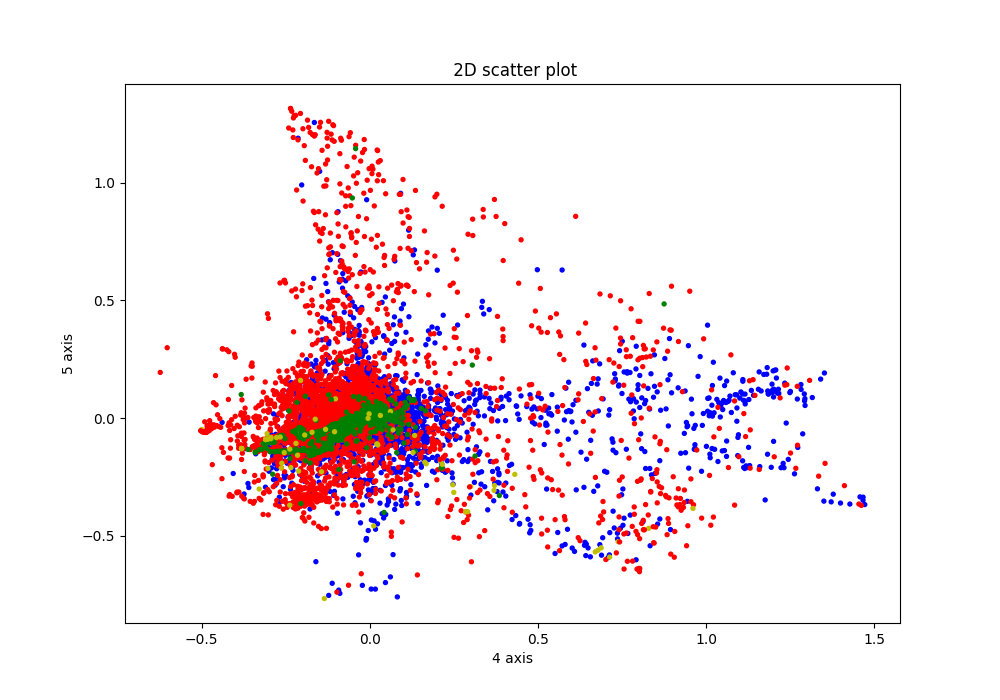

In [38]:
#projection on the axes (4,5)

fig = plt.figure(figsize = (10, 7)) 
ax = plt.axes(projection ="rectilinear")

ax.scatter(dataset[:, 3], dataset[:, 4], color = color_info["color"], s = 8)
plt.title(" 2D scatter plot")
ax.set_xlabel('4 axis')
ax.set_ylabel('5 axis')
plt.show()